In [56]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [57]:
import keras
keras.__version__

'2.9.0'

In [58]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)
print(np.random.randint(10, size=10))

[9 4 0 1 9 0 1 8 9 0]


In [59]:
#import mnist資料集
from keras.datasets import mnist

In [60]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [61]:
print('train data=', len(x_train_image))
print(' test data=', len(x_test_image))

train data= 60000
 test data= 10000


In [62]:
print('x_train_image:', x_train_image.shape)
print(x_train_image.shape[0])
print('y_train_label:', y_train_label.shape)

x_train_image: (60000, 28, 28)
60000
y_train_label: (60000,)


In [63]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()
    
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: 
        num=25
    for i in range(0, num):
        ax= plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);
        ax.set_yticks([])
        idx+=1
    plt.show()

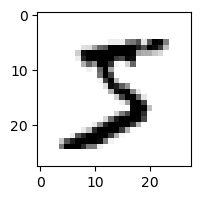

In [64]:
plot_image(x_train_image[0])
# print(x_train_image[0]) //點陣化
# y_train_label[0]
# plot_images_labels_prediction(x_train_image, y_train_label,[],0,10)

In [65]:
# print('x_train_image:', x_train_image.shape)
# print('y_train_label:', y_train_label.shape)

In [66]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test  = x_test_image.reshape(10000,784).astype('float32')
print('x_train:', x_Train.shape)
print('x_ test:', x_Test.shape)

x_train: (60000, 784)
x_ test: (10000, 784)


In [67]:
# x_Train[0]
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [68]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [69]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [70]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [71]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [72]:
print(y_train_label[:5])
print(y_Train_OneHot[:5])
print()
print(y_test_label[:5])
print(y_Test_OneHot[:5])

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

[7 2 1 0 4]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [73]:
# from keras.utils import np_utils
# import numpy as np
# np.random.seed(10)

In [74]:
# from keras.datasets import mnist
# (x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [75]:
# x_Train = x_train_image.reshape(60000,784).astype('float32')
# x_Test = x_test_image.reshape(10000,784).astype('float32')
# x_Train_normalize = x_Train / 255
# x_Test_normalize = x_Test / 255
# y_Train_OneHot = np_utils.to_categorical(y_train_label)
# y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [76]:
# MLP 多元感知器 #Sequential有序的 #Dense稠密的
from keras.models import Sequential
from keras.layers import Dense

In [77]:
# 輸入層。隱藏層。輸出層。超參數
model = Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [78]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [79]:
train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,
            validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Epoch 1/10
240/240 - 2s - loss: 0.4450 - accuracy: 0.8809 - val_loss: 0.2248 - val_accuracy: 0.9373 - 2s/epoch - 9ms/step
Epoch 2/10
240/240 - 1s - loss: 0.1896 - accuracy: 0.9458 - val_loss: 0.1566 - val_accuracy: 0.9567 - 1s/epoch - 6ms/step
Epoch 3/10
240/240 - 1s - loss: 0.1360 - accuracy: 0.9606 - val_loss: 0.1320 - val_accuracy: 0.9624 - 1s/epoch - 6ms/step
Epoch 4/10
240/240 - 1s - loss: 0.1035 - accuracy: 0.9707 - val_loss: 0.1120 - val_accuracy: 0.9672 - 1s/epoch - 6ms/step
Epoch 5/10
240/240 - 2s - loss: 0.0831 - accuracy: 0.9762 - val_loss: 0.1063 - val_accuracy: 0.9703 - 2s/epoch - 6ms/step
Epoch 6/10
240/240 - 1s - loss: 0.0674 - accuracy: 0.9805 - val_loss: 0.0899 - val_accuracy: 0.9742 - 1s/epoch - 5ms/step
Epoch 7/10
240/240 - 1s - loss: 0.0549 - accuracy: 0.9844 - val_loss: 0.0895 - val_accuracy: 0.9728 - 1s/epoch - 5ms/step
Epoch 8/10
240/240 - 1s - loss: 0.0459 - accuracy: 0.9870 - val_loss: 0.0855 - val_accuracy: 0.9747 - 1s/epoch - 5ms/step
Epoch 9/10
240/240 - 1s 

In [80]:
# 訓練紀錄
# train_history.history

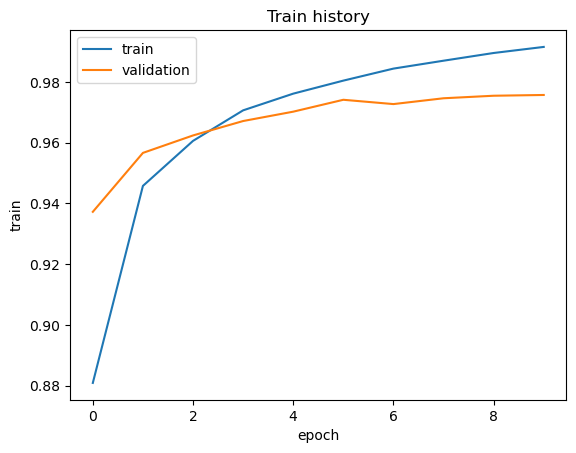

In [81]:
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):

  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train history')
  plt.ylabel('train')
  plt.xlabel('epoch')

  # 設置圖例在左上角
  plt.legend(['train','validation'],loc='upper left')
  plt.show()
# overfitting
show_train_history(train_history,'accuracy','val_accuracy')

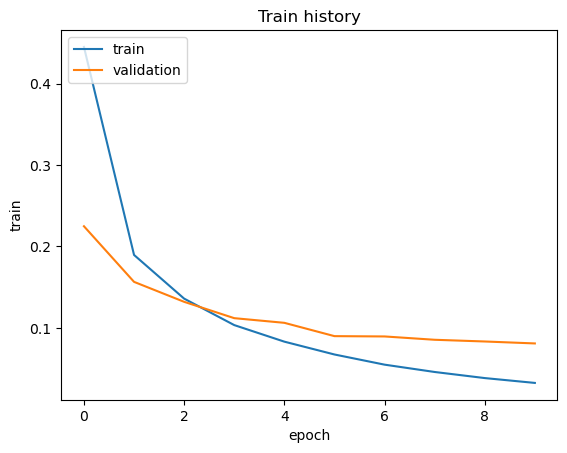

In [82]:
show_train_history(train_history,'loss','val_loss')

In [83]:
# 使用model驗證準確率
scores=model.evaluate(x_Test_normalize,y_Test_OneHot)
# model.save('st.h5') #副檔名一定要是h5
print()
print('loss    ',scores[0])
print('accuracy',scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9771

loss     0.07334039360284805
accuracy 0.9771000146865845


313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


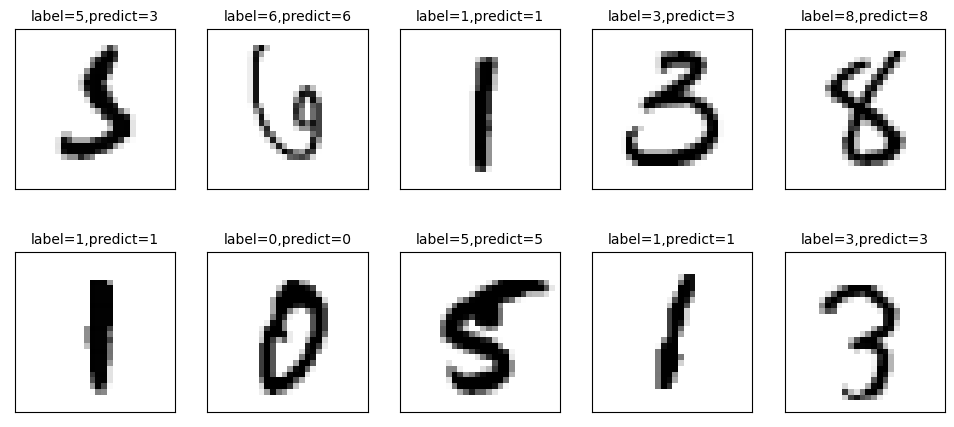

In [84]:
# 使用model預測測試資料
predict_x=model.predict(x_Test) 
prediction=np.argmax(predict_x,axis=1)

# prediction=model.predict_classes(x_Test) 已廢棄替換
print(prediction)

plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [85]:
import pandas as pd

pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['prediction'])

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,0,1,0,1,1,1,1,1,1
1,0,1127,4,0,0,1,2,0,1,0
2,4,0,1009,0,2,0,3,7,5,2
3,0,0,3,989,0,3,0,6,4,5
4,0,0,4,0,955,0,1,4,0,18
5,3,0,0,9,1,863,6,2,4,4
6,4,4,3,1,6,4,934,0,2,0
7,0,4,7,3,0,0,0,1008,0,6
8,5,2,3,8,5,5,1,4,936,5


In [86]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:10]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [87]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2526,5,3
2810,5,3
3902,5,3
5937,5,3
5972,5,3
6598,5,3


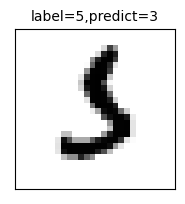

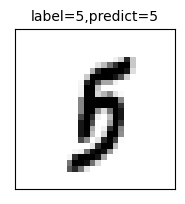

In [88]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=4300,num=1)

In [89]:
model= Sequential()

model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='softmax'))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              785000    
                                                                 
 dense_5 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [90]:
# 開始訓練
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Epoch 1/10
240/240 - 4s - loss: 2.0134 - accuracy: 0.7245 - val_loss: 1.7047 - val_accuracy: 0.8739 - 4s/epoch - 17ms/step
Epoch 2/10
240/240 - 3s - loss: 1.5149 - accuracy: 0.8978 - val_loss: 1.3286 - val_accuracy: 0.9155 - 3s/epoch - 14ms/step
Epoch 3/10
240/240 - 4s - loss: 1.1922 - accuracy: 0.9160 - val_loss: 1.0534 - val_accuracy: 0.9224 - 4s/epoch - 15ms/step
Epoch 4/10
240/240 - 4s - loss: 0.9526 - accuracy: 0.9237 - val_loss: 0.8476 - val_accuracy: 0.9282 - 4s/epoch - 16ms/step
Epoch 5/10
240/240 - 3s - loss: 0.7745 - accuracy: 0.9299 - val_loss: 0.6982 - val_accuracy: 0.9310 - 3s/epoch - 14ms/step
Epoch 6/10
240/240 - 5s - loss: 0.6440 - accuracy: 0.9333 - val_loss: 0.5879 - val_accuracy: 0.9341 - 5s/epoch - 19ms/step
Epoch 7/10
240/240 - 5s - loss: 0.5479 - accuracy: 0.9357 - val_loss: 0.5092 - val_accuracy: 0.9332 - 5s/epoch - 20ms/step
Epoch 8/10
240/240 - 4s - loss: 0.4757 - accuracy: 0.9385 - val_loss: 0.4487 - val_accuracy: 0.9359 - 4s/epoch - 15ms/step
Epoch 9/10
240/2

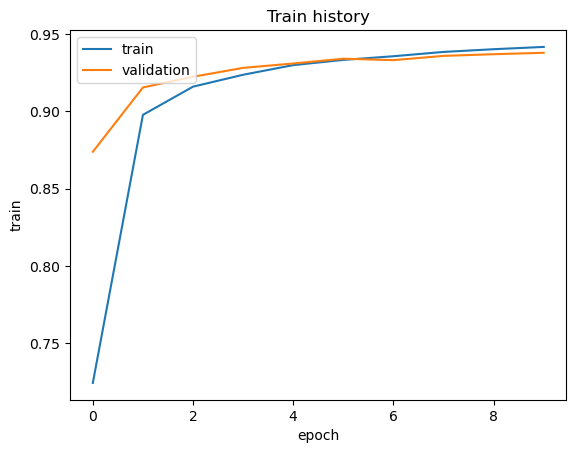

In [91]:
show_train_history(train_history,'accuracy','val_accuracy')

In [94]:
from keras.models import Sequential
from keras.layers import Dense

# 主要加入這個 dropout
from keras.layers import Dropout

model = Sequential()

model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
# activation可試softmax準確率會差很多
model.add(Dropout(0.5))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
print(model.summary())

# 開始訓練
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              785000    
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_9 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/10
240/240 - 3s - loss: 0.3528 - accuracy: 0.8948 - val_loss: 0.1576 - val_accuracy: 0.9560 - 3s/epoch - 14ms/step
Epoch 2/10
240/240 - 3s - loss: 0.1608 - accuracy: 0.9528 - val_loss: 0.1241 - val_accuracy: 0.9654 - 3s/epoch - 12ms/step
Epoch 3/10
240/240 - 3s - loss: 0.1167 - accuracy: 0.9663 - val_loss: 0.0969 - val_accuracy: 0.9706 - 3s/epoch - 13ms/step
Epoch 4/10
240/240 - 3s - loss: 0.0921 - accuracy: 0.9718 - val_loss: 0.0860 - val_accuracy: 0.9737 - 3s/epoch - 14ms/step
Epoch 5/10
240/240 - 3s - loss: 0.0749 - accuracy: 0.9775 - val_loss: 0.0792 - val_accuracy: 0.9761 - 3s/epoch - 12ms/step
Epoch 6/10
240/240 - 3s - loss: 0.0630 - accuracy: 0.9805 - val_loss: 0.0735 - val_accuracy: 0.9774 - 3s/epoch - 12ms/step
Epoch 7/10
240/240 - 3s - loss: 0.0531 - accuracy: 0.9838 - val_loss: 0.0716 - val_accuracy: 0.9783 - 3s/epoch - 12ms/step
Epoch 8/10
240/240 - 3s - loss: 0.0494 - accuracy: 0.9849 - val_loss: 0.0732 - val_accuracy: 0.9777 - 3s/epoch - 12ms/step
Epoch 9/10
240/2

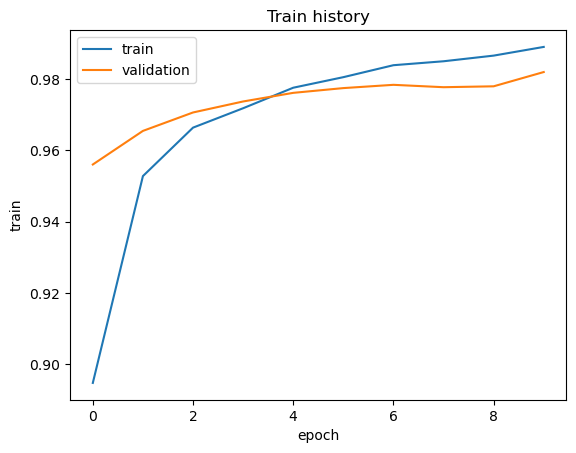

In [95]:
train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)
show_train_history(train_history,'accuracy','val_accuracy')

In [96]:
scores=model.evaluate(x_Test_normalize,y_Test_OneHot)
print()
print('accuracy',scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0589 - accuracy: 0.9827

accuracy 0.982699990272522


In [107]:
model = Sequential()

model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1000,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [108]:
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 1000)              785000    
                                                                 
 dropout_18 (Dropout)        (None, 1000)              0         
                                                                 
 dense_35 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_19 (Dropout)        (None, 1000)              0         
                                                                 
 dense_36 (Dense)            (None, 10)                10010     
                                                                 
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [109]:
# 開始訓練
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Epoch 1/10
240/240 - 8s - loss: 0.3739 - accuracy: 0.8818 - val_loss: 0.1340 - val_accuracy: 0.9588 - 8s/epoch - 35ms/step
Epoch 2/10
240/240 - 7s - loss: 0.1617 - accuracy: 0.9498 - val_loss: 0.1018 - val_accuracy: 0.9688 - 7s/epoch - 30ms/step
Epoch 3/10
240/240 - 7s - loss: 0.1216 - accuracy: 0.9620 - val_loss: 0.0935 - val_accuracy: 0.9721 - 7s/epoch - 31ms/step
Epoch 4/10
240/240 - 7s - loss: 0.0981 - accuracy: 0.9685 - val_loss: 0.0853 - val_accuracy: 0.9742 - 7s/epoch - 29ms/step
Epoch 5/10
240/240 - 7s - loss: 0.0860 - accuracy: 0.9728 - val_loss: 0.0796 - val_accuracy: 0.9750 - 7s/epoch - 30ms/step
Epoch 6/10
240/240 - 8s - loss: 0.0776 - accuracy: 0.9753 - val_loss: 0.0813 - val_accuracy: 0.9770 - 8s/epoch - 34ms/step
Epoch 7/10
240/240 - 7s - loss: 0.0687 - accuracy: 0.9784 - val_loss: 0.0860 - val_accuracy: 0.9763 - 7s/epoch - 31ms/step
Epoch 8/10
240/240 - 7s - loss: 0.0587 - accuracy: 0.9810 - val_loss: 0.0783 - val_accuracy: 0.9781 - 7s/epoch - 30ms/step
Epoch 9/10
240/2

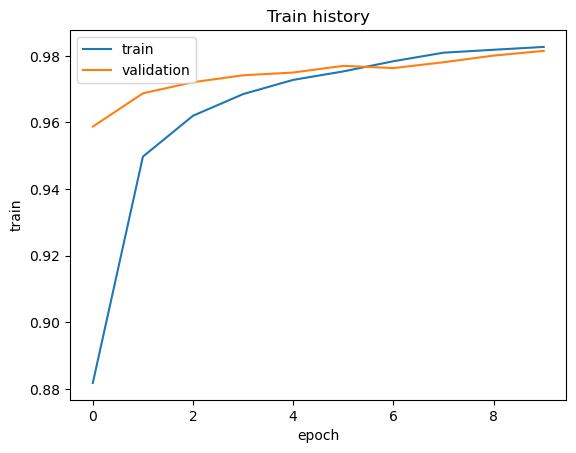

313/313 [==============================] - 2s 6ms/step - loss: 0.0585 - accuracy: 0.9832

accuracy 0.9832000136375427


In [111]:
show_train_history(train_history,'accuracy','val_accuracy')

scores=model.evaluate(x_Test_normalize,y_Test_OneHot)
print()
print('accuracy',scores[1])